In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Carrega o dataset
#df = pd.read_csv("dados/teste2.csv", encoding = 'utf-8')
df = pd.read_csv("Dataset_Covid_CE_2K.csv", encoding = 'utf-8')

/Users/paulocordeiro/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,6,7,8,9,10,11,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47,49,50,51,52,53,54,55,56,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
listaCamposSuprimidos = ["dataNascimento", "sexoCaso", "racaCor", "municipioCaso","comorbidadeAsmaSivep","comorbidadeCardiovascularSivep","resultadoFinalExame"]

In [34]:
def retonaTotalInfo(df):
    qtd_linhas_total = df.shape[0]
    qtd_colunas_total = df.shape[1]
    return qtd_linhas_total * qtd_colunas_total

In [70]:
def retonaTotalInfoRest(df):
    qtd_linhas_total = df.shape[0]
    qtd_colunas_total = len(listaCamposSuprimidos)
    return qtd_linhas_total * qtd_colunas_total

In [71]:
def retornaTotalCamposSup(df):
    qtd_suprimidos = 0

    for campo in listaCamposSuprimidos:
        qtd_s = df[df[campo]=="*"].shape[0]
        qtd_suprimidos = qtd_suprimidos + qtd_s

    return qtd_suprimidos    

In [72]:
def retornaPercInfoSup(strFile):
    df = pd.read_csv(strFile, encoding = 'utf-8')
    TotalInformacao = retonaTotalInfo(df)
    qtd_suprimidos = retornaTotalCamposSup(df)
    del(df)
    return (qtd_suprimidos / TotalInformacao)

In [73]:
def retornaPercInfoSupRest(strFile):
    df = pd.read_csv(strFile, encoding = 'utf-8')
    TotalInformacao = retonaTotalInfoRest(df)
    qtd_suprimidos = retornaTotalCamposSup(df)
    del(df)
    return (qtd_suprimidos / TotalInformacao)

In [74]:
%%time
PercInfoSup2k = retornaPercInfoSup("Dataset_Covid_CE_2K.csv")
PercInfoSup4k = retornaPercInfoSup("Dataset_Covid_CE_4K.csv")
PercInfoSup8k = retornaPercInfoSup("Dataset_Covid_CE_8K.csv")
PercInfoSup16k = retornaPercInfoSup("Dataset_Covid_CE_16K.csv")

/Users/paulocordeiro/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (0,5,6,7,8,9,10,11,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47,49,50,51,52,53,54,55,56,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


CPU times: user 46.2 s, sys: 6.03 s, total: 52.2 s
Wall time: 1min 7s


In [75]:
%%time
PercInfoSup2kRest = retornaPercInfoSupRest("Dataset_Covid_CE_2K.csv")
PercInfoSup4kRest = retornaPercInfoSupRest("Dataset_Covid_CE_4K.csv")
PercInfoSup8kRest = retornaPercInfoSupRest("Dataset_Covid_CE_8K.csv")
PercInfoSup16kRest = retornaPercInfoSupRest("Dataset_Covid_CE_16K.csv")

CPU times: user 46 s, sys: 5.97 s, total: 52 s
Wall time: 53.2 s


In [76]:
PercInfoSup2kinvRest = 1-PercInfoSup2kRest
PercInfoSup4kinvRest = 1-PercInfoSup4kRest
PercInfoSup8kinvRest = 1-PercInfoSup8kRest
PercInfoSup16kinvRest = 1-PercInfoSup16kRest

In [77]:
percsinvRest = [PercInfoSup2kinvRest,PercInfoSup4kinvRest,PercInfoSup8kinvRest,PercInfoSup16kinvRest]
percsRest = [PercInfoSup2kRest,PercInfoSup4kRest,PercInfoSup8kRest,PercInfoSup16kRest]

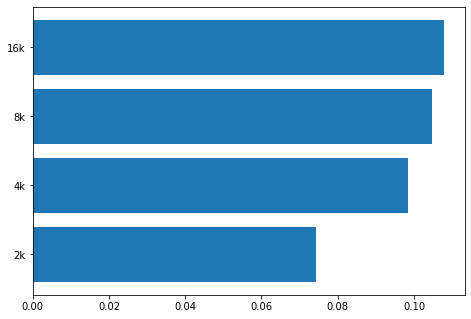

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['2k', '4k', '8k', '16k']
students = percsRest
ax.barh(langs,students)
plt.show()

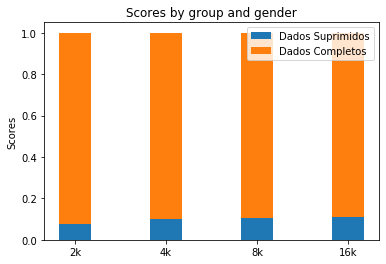

In [79]:
labels = ['G1', 'G2', 'G3', 'G4']
men_means = percsRest
women_means = percsinvRest
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(langs, men_means, width, label='Dados Suprimidos')
ax.bar(langs, women_means, width, bottom=men_means, label='Dados Completos')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [65]:
percs = [PercInfoSup2k,PercInfoSup4k,PercInfoSup8k,PercInfoSup16k]
percsinv = [PercInfoSup2kinv,PercInfoSup4kinv,PercInfoSup8kinv,PercInfoSup16kinv]

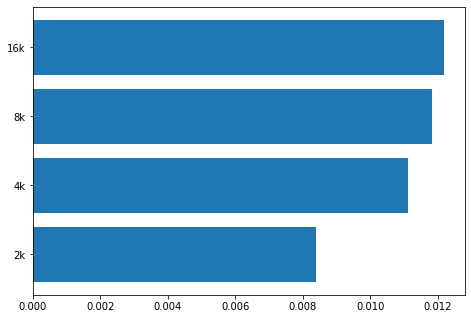

In [57]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['2k', '4k', '8k', '16k']
students = percs
ax.barh(langs,students)
plt.show()

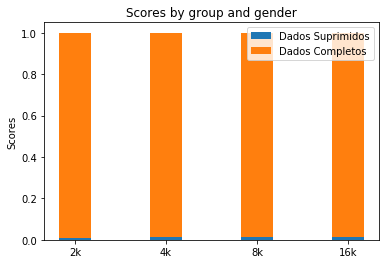

In [69]:
labels = ['G1', 'G2', 'G3', 'G4']
men_means = percs
women_means = percsinv
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(langs, men_means, width, label='Dados Suprimidos')
ax.bar(langs, women_means, width, bottom=men_means, label='Dados Completos')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()